In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv');train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot: >

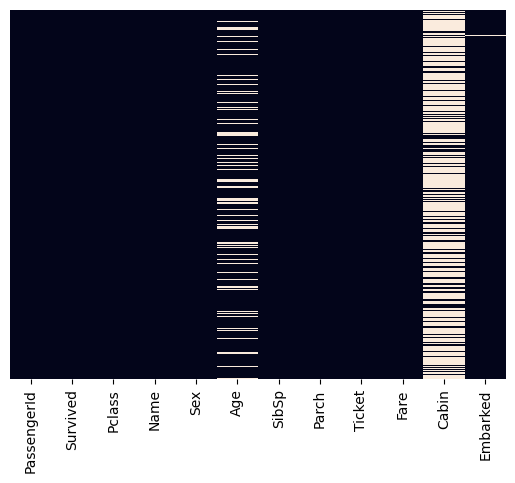

In [4]:
sns.heatmap(train.isnull(),yticklabels=False, cbar= False)

## Dealing with the missing values

In [5]:
round(train.groupby('Pclass').mean()['Age'],)

C:\Users\user\AppData\Local\Temp\ipykernel_9268\3707636798.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  round(train.groupby('Pclass').mean()['Age'],)


Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [6]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 38 
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [7]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

In [8]:
#The cabin column has alot of missing values and contains data that is not relevant to our project we may drop it
train.drop('Cabin',axis=1,inplace=True)

In [9]:
train.dropna(inplace=True)

## The Sex and the Embarked column should be converted to numeric form

In [10]:
male = pd.get_dummies(train['Sex'],drop_first=True)

In [11]:
Embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [12]:
train = pd.concat([train,male,Embarked],axis=1)

In [13]:
#There are columns which are irrelevant with respect to our project thus we drop them
train.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Importing the test data

In [14]:
test = pd.read_csv('titanic_test.csv')

In [15]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data cleaning similar to that of the Training data

In [16]:
test['Age'] = test[['Age','Pclass']].apply(impute_age, axis=1)

In [17]:
test.drop('Cabin',axis=1,inplace=True)

In [18]:
test.dropna(inplace=True)

<AxesSubplot: >

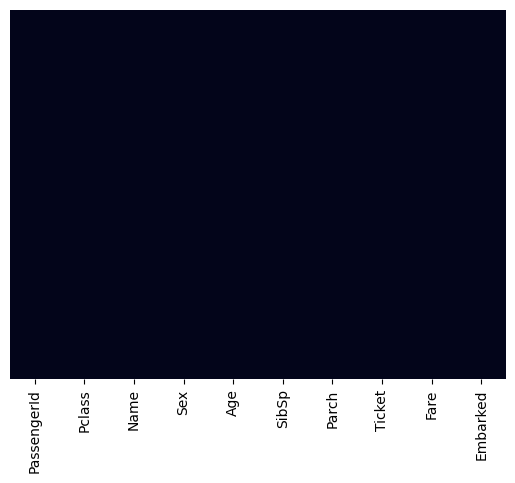

In [19]:
sns.heatmap(test.isnull(),yticklabels=False, cbar= False)

In [20]:
male = pd.get_dummies(test['Sex'],drop_first=True)

In [21]:
Embarked = pd.get_dummies(test['Embarked'],drop_first=True)

In [22]:
test = pd.concat([test,male,Embarked],axis=1)

In [23]:
#There are columns which are irrelevant with respect to our project thus we drop them
test.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


## Converting the variables to X and y variable for model building

In [24]:
X_train = train.drop(['PassengerId','Survived'],axis=1)
y_train = train['Survived']

In [25]:
X_test = test.drop('PassengerId',axis=1)

## Logistic Regression Model 

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train,y_train)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
predictions = pd.DataFrame(model.predict(X_test), columns = ['Predicted'])

In [30]:
PassengerIdc = pd.DataFrame(test['PassengerId'], columns = ['PassengerId'])

In [31]:
LR_Model_predictions = pd.concat([PassengerIdc,predictions],axis=1)

In [32]:
LR_Model_predictions.dropna(inplace=True)

In [33]:
LR_Model_predictions['Predicted'].value_counts()

0.0    259
1.0    157
Name: Predicted, dtype: int64

In [34]:
#Accuracy of the Logistic Regression model
LR_Accuracy = model.score(X_train,y_train)*100
LR_Accuracy

80.53993250843644

In [35]:
#The aim of the project was to predict whether a passenger aboard the Titanic survived or died after the fatal accident.
#The predicted values were assigned to their respective Passenger ID's to determine whether a particular passenger died or survived
#where 1 is the probability that the passenger survived while 0 is hte probability the passenger died.

## Random Forest Classifier model

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
RFC_model = RandomForestClassifier()

In [38]:
RFC_model.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
Pred1 = pd.DataFrame(RFC_model.predict(X_test), columns = ['Predicted'])

In [40]:
RFC_model_predictions = pd.concat([PassengerIdc,Pred1],axis=1)
RFC_model_predictions.head()

,PassengerId,Predicted
0,892.0,0.0
1,893.0,0.0
2,894.0,0.0
3,895.0,1.0
4,896.0,0.0


In [41]:
RFC_model_predictions['Predicted'].value_counts()

0.0    261
1.0    156
Name: Predicted, dtype: int64

In [42]:
#Accuracy of the Random Forest Classifier model
RFC_Accuracy = RFC_model.score(X_train,y_train)*100
RFC_Accuracy

98.08773903262093

## Decision Tree Classifier model

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
DTC_model = DecisionTreeClassifier() 

In [45]:
DTC_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
Pred2 = pd.DataFrame(DTC_model.predict(X_test), columns = ['Predicted'])

In [47]:
DTC_model_predictions = pd.concat([PassengerIdc,Pred2],axis=1)

In [48]:
DTC_model_predictions['Predicted'].value_counts()

0.0    259
1.0    158
Name: Predicted, dtype: int64

In [49]:
#Accuracy of the Decision Tree Classifier model
DTC_Accuracy = DTC_model.score(X_train,y_train)*100
DTC_Accuracy

98.08773903262093

## KNN Classifier model

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [52]:
Pred3 = pd.DataFrame(KNN.predict(X_test), columns = ['Predicted'])
KNN_model_predictions = pd.concat([PassengerIdc,Pred3],axis=1)

In [53]:
KNN_model_predictions['Predicted'].value_counts()

0.0    325
1.0     92
Name: Predicted, dtype: int64

In [54]:
#Accuracy of the Decision Tree Classifier model
KNN_Accuracy = KNN.score(X_train,y_train)*100
KNN_Accuracy

84.4769403824522

## Sample Submission

In [55]:
RFC_model_predictions.to_csv('Titanic Survivors.csv', index=False)
DTC_model_predictions.to_csv('Titanic_Survivors.csv', index=False)